# Bank Note Authentication Assignment

In [1]:
import pandas as pd
#importing K nearest neighbors classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import math

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Data Science Eugene Pinsky/Homework_6/bank_notes/data_banknote_authentication.csv")

In [3]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


Question 3.

1.

In [4]:
#splitting dataset into features and class labels
X = df[["variance","skewness","curtosis","entropy"]]
y = df[["class"]]

results_q3 = pd.DataFrame(columns=["k_neighbors","accuracy_score"])

scaler = StandardScaler()

for i,k in enumerate(range(3,12,2)):
  #building model for each k
  knn = KNeighborsClassifier(n_neighbors=k)

  #splitting data each time 50:50 train test split
  X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.5)
  
  #scaling training data (X_train)
  X_train = scaler.fit_transform(X_train)

  #fitting classifier to training data
  knn.fit(X_train,y_train)

  X_test = scaler.transform(X_test)
  #predicting labels and storing results in y_pred 
  y_pred = knn.predict(X_test)

  #computing accuracy
  accuracy  = accuracy_score(y_test,y_pred)  

  #appending results for each K.
  results_q3.loc[i] = [int(k)] + [round(accuracy*100,2)]

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

In [5]:
results_q3

,k_neighbors,accuracy_score
0,3.0,99.85
1,5.0,99.85
2,7.0,99.71
3,9.0,99.85
4,11.0,99.42


2.

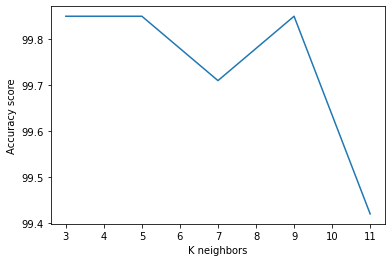

In [6]:
plt.plot(results_q3["k_neighbors"],results_q3["accuracy_score"])
plt.xlabel("K neighbors")
plt.ylabel("Accuracy score")
plt.show()

The optimal value k* is 11 neighbors which gives me the highest accuracy of 80.9%.

3.

In [7]:
#splitting dataset into features and class labels
X = df[["variance","skewness","curtosis","entropy"]]
y = df[["class"]]

scaler = StandardScaler()

knn = KNeighborsClassifier(n_neighbors=11)

#splitting data each time 50:50 train test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.5)

#scaling training data (X_train)
X_train = scaler.fit_transform(X_train)

#fitting classifier to training data
knn.fit(X_train,y_train)

#predicting labels and storing results in y_pred 
y_pred = knn.predict(X_test)

accuracy  = accuracy_score(y_test,y_pred)  

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [8]:
results_metrics_q3 = pd.DataFrame(columns = ["TP","FP","TN","FN","accuracy","TPR","TNR"])

#calcultaing true/false and positive/negative 
tn,fp,fn,tp = confusion_matrix(y_test,y_pred).ravel()

#calcultaing true positive rate
tpr = tp / (tp + fn)

#calculating true negative rate
tnr = tn / (tn + fp)

#appending results to dataframe
results_metrics_q3.loc[0] = [tp] + [fp] + [tn] + [fn] + [round(accuracy*100,2)] + [round(tpr*100,2)] + [round(tnr*100,2)]

#displaying results in tabular form
results_metrics_q3

,TP,FP,TN,FN,accuracy,TPR,TNR
0,210.0,35.0,339.0,102.0,80.03,67.31,90.64


4.
First observation is my overall model accuracy has increased from 63% to 80%.
The true positive rate has increased from 18% to 68% , which shows my model has improved at detecting real notes drastically.
The false positive rate has reduced from 99% (in my simple classifier) to 91% (in k nearest neighbors) which is still a good rate.
So the k nearest neighbor is good at detecting both real notes and fake notes.


5.

In [9]:
#taking last four digits of BUID to be test set.
x = [4,3,9,8]

In [10]:
#simple classifier code
#iterating through the dataframe
print("The result of my simple classifer is: ")
if (x[0] < 0) and (x[3] < 0) and (x[2] > 5) :
    print("\tThe note is fake (class : 1)")
else:
    print("\tThe note is real (class : 0)")


The result of my simple classifer is: 
	The note is real (class : 0)


In [11]:
y_pred = knn.predict([x])
print("The result of K nearest neighbors classifer is: ")
if y_pred == 1 :
    print("\tThe note is fake (class : 1)")
else:
    print("\tThe note is real (class : 0)")


The result of K nearest neighbors classifer is: 
	The note is real (class : 0)


My simple classifier predicted my note with these values to be a real note.
The result obtained by the K nearest neighbor classifier using k* was also the same as it predicted my note to be a real note.


Question 4.

1.

In [12]:
# #storing best value of k
# k_star = 11

# #storing feature names in list
# features = ["variance","skewness","curtosis","entropy"]

# #storing class labels 
# y = df["class"]

# results_on_omitting_features = pd.DataFrame(columns=['F1','F2','F3','F4','accuracy','delta']) 


# #Model with all features F1 through F4.
# scaler = StandardScaler()

# knn = KNeighborsClassifier(n_neighbors=11)

# #splitting data each time 50:50 train test split
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.5)

# #scaling training data (X_train)
# X_train = scaler.fit_transform(X_train)

# #fitting classifier to training data
# knn.fit(X_train,y_train)

# #predicting labels and storing results in y_pred 
# y_pred = knn.predict(X_test)

# accuracy  = accuracy_score(y_test,y_pred)

# results_on_omitting_features.loc[0] = ["1"]+["1"]+["1"]+["1"]+[round(accuracy*100,2)]+[0]


# #iterates equal to number of features i.e 4 times
# for i,f in enumerate(features):

#   X = df.drop([f],axis=1)
  
#   scaler = StandardScaler()

#   knn = KNeighborsClassifier(n_neighbors=11)

#   #splitting data each time 50:50 train test split
#   X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.5)

#   #scaling training data (X_train)
#   X_train = scaler.fit_transform(X_train)

#   #fitting classifier to training data
#   knn.fit(X_train,y_train)

#   #predicting labels and storing results in y_pred 
#   y_pred = knn.predict(X_test)

#   accuracy  = accuracy_score(y_test,y_pred)

#   #conditions to append data based on which feature is being ommited  
#   if i == 0:
#     results_on_omitting_features.loc[i+1] = ["0"]+["1"]+["1"]+["1"]+ [round(accuracy*100,2)]+[ round(accuracy*100,2) - ( results_on_omitting_features.loc[0]['accuracy'] )]

#   elif i == 1:
#     results_on_omitting_features.loc[i+1] = ["1"]+["0"]+["1"]+["1"]+ [round(accuracy*100,2)]+[ round(accuracy*100,2) - ( results_on_omitting_features.loc[0]['accuracy'] )]

#   elif i == 2:
#     results_on_omitting_features.loc[i+1] = ["1"]+["1"]+["0"]+["1"]+ [round(accuracy*100,2)]+[ round(accuracy*100,2) - ( results_on_omitting_features.loc[0]['accuracy'] )]

#   elif i == 3:
#     results_on_omitting_features.loc[i+1] = ["1"]+["1"]+["1"]+["0"]+ [round(accuracy*100,2)]+[ round(accuracy*100,2) - ( results_on_omitting_features.loc[0]['accuracy'] )]
  
  



In [15]:
features = ["variance","skewness","curtosis","entropy"]

X = df[["variance","skewness","curtosis","entropy"]]

#storing class labels 
y = df[["class"]]

results_on_omitting_features = pd.DataFrame(columns=['F1','F2','F3','F4','accuracy','delta'])

#Model with all features F1 through F4.
scaler = StandardScaler()

#splitting data each time 50:50 train test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.5,random_state=42)

#scaling training data (X_train)
X_train = scaler.fit_transform(X_train)

knn = KNeighborsClassifier(n_neighbors=11)

#fitting classifier to training data
knn.fit(X_train,y_train)

#predicting labels and storing results in y_pred 
y_pred = knn.predict(X_test)

accuracy  = accuracy_score(y_test,y_pred)

results_on_omitting_features.loc[0] = ["1"]+["1"]+["1"]+["1"]+[round(accuracy*100,2)]+[0]

#iterates equal to number of features i.e 4 times
for i,f in enumerate(features):

  #splitting data each time 50:50 train test split
  X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.5,random_state=42)

  #dropping features from both train and test data
  X_train = X_train.drop([f],axis=1)
  
  X_test = X_test.drop([f],axis=1)
  
  scaler = StandardScaler()

  knn = KNeighborsClassifier(n_neighbors=11)
  
  #scaling training data (X_train)
  X_train = scaler.fit_transform(X_train)

  #fitting classifier to training data
  knn.fit(X_train,y_train)

  #predicting labels and storing results in y_pred 
  y_pred = knn.predict(X_test)

  accuracy  = accuracy_score(y_test,y_pred)

  #conditions to append data based on which feature is being ommited  
  if i == 0:
    results_on_omitting_features.loc[i+1] = ["0"]+["1"]+["1"]+["1"]+ [round(accuracy*100,2)]+[ round(accuracy*100,2) - ( results_on_omitting_features.loc[0]['accuracy'] )]

  elif i == 1:
    results_on_omitting_features.loc[i+1] = ["1"]+["0"]+["1"]+["1"]+ [round(accuracy*100,2)]+[ round(accuracy*100,2) - ( results_on_omitting_features.loc[0]['accuracy'] )]

  elif i == 2:
    results_on_omitting_features.loc[i+1] = ["1"]+["1"]+["0"]+["1"]+ [round(accuracy*100,2)]+[ round(accuracy*100,2) - ( results_on_omitting_features.loc[0]['accuracy'] )]

  elif i == 3:
    results_on_omitting_features.loc[i+1] = ["1"]+["1"]+["1"]+["0"]+ [round(accuracy*100,2)]+[ round(accuracy*100,2) - ( results_on_omitting_features.loc[0]['accuracy'] )]
  


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7

In [16]:
results_on_omitting_features

,F1,F2,F3,F4,accuracy,delta
0,1,1,1,1,80.47,0
1,0,1,1,1,60.79,-19.68
2,1,0,1,1,82.94,2.47
3,1,1,0,1,80.90,0.43
4,1,1,1,0,80.90,0.43


2. Accuracy increased in only one of the following instances, when we omitted the second feature F2 i.e skewness. The accuracy increased by 0.14 from 90.82 to 90.96.

3. When the feature F1 or variance was removed it contributed to the greatest loss in accuracy which was a drop of -9.33 from 90.82 to 81.49.

4. When the feature F3 or curtosis was removed it contributed to the least loss in accuracy which was a drop of - 1.02 from 90.82 to 89.80.